In [15]:
%matplotlib widget

import re
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [16]:
#definizione delle variabili

linesHeader=26
realTimeLine = 6  # header line with real time value
nBin=200

In [17]:
#file_path = r"C:\Users\ricca\Documents\Esempio dati\AXIS_W111_Matek_IJC_run1_mca1.txt"
file_path = r"C:\Users\ricca\Documents\Esempio dati\AXIS_W111_MATEK_IJC_06_11_2021_15h18_MCA1.txt"
file_path_bg = r"C:\Users\ricca\Documents\Esempio dati\background_06_11_2021_15h04_MCA1.txt"

#_,x,y,_= np.loadtxt(file_path, unpack=True, comments="#")
_, x, y, _= np.loadtxt(file_path, unpack=True, comments="#", skiprows=47)
channels, x_bg, y_bg, _ =np.loadtxt(file_path_bg, unpack=True, comments="#", skiprows=47)

# salvare la prima parte del file di testo come header
#header = pd.read_csv(file_path, skiprows = lambda i : i > linesHeader, on_bad_lines='skip')
header = pd.read_csv(file_path, squeeze=True, skiprows = lambda i : i > linesHeader, on_bad_lines='skip')
header_bg = pd.read_csv(file_path_bg, squeeze=True, skiprows = lambda i : i > linesHeader, on_bad_lines='skip')

t = float(re.findall(r"[-+]?\d*\.\d+|\d+", header[realTimeLine])[0])  # acquisition real time
t_bg = float(re.findall(r"[-+]?\d*\.\d+|\d+", header_bg[realTimeLine])[0])  # acquisition real time


C:\Users\ricca\AppData\Local\Temp\ipykernel_3296\3844124321.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  header = pd.read_csv(file_path, squeeze=True, skiprows = lambda i : i > linesHeader, on_bad_lines='skip')
C:\Users\ricca\AppData\Local\Temp\ipykernel_3296\3844124321.py:12: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  header_bg = pd.read_csv(file_path_bg, squeeze=True, skiprows = lambda i : i > linesHeader, on_bad_lines='skip')


In [18]:
# conversion into MeV
x = x * 1e-3  
x_bg = x_bg * 1e-3 
# spectrum normalisation
y = y / t 
y_bg = y_bg / t_bg
data=[x, y, t]
data_bg=[x_bg, y_bg, t_bg]
def rebin(x0, y0, nBin):
    x, y = np.empty(0), np.empty(0)
    for i in range(0, math.floor(len(x0)/nBin)*nBin, nBin):
        x = np.append(x, sum(x0[i:(i+nBin)])/nBin)
        y = np.append(y, sum(y0[i:(i+nBin)]))
    return x, y

# PLOTS

In [19]:
plt.close("spectra_raw")

#PLOT OF REBINNED DATA BUT WITH NO MANIPULATION     
x, y = rebin(data[0], data[1], nBin)
x_bg_reb,y_bg_reb=rebin(data_bg[0],data_bg[1],nBin)
'''fig, ax = plt.subplots(num="spectra_raw", figsize=[9, 7], nrows=2, sharex=True)
ax[0].plot(x, y)
ax[0].plot(x_bg_reb, y_bg_reb)
ax[1].plot(x, y*x)

ax[0].set_yscale("log")
ax[0].grid()
ax[0].set_ylabel("photon spectrum [1/s]")
ax[1].grid()
ax[1].set_ylabel("spectral intensity [MeV/s]")
ax[1].set_xlabel("energy [MeV]")
fig.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout(pad=1)
plt.show()
print(len(y_bg))'''

'fig, ax = plt.subplots(num="spectra_raw", figsize=[9, 7], nrows=2, sharex=True)\nax[0].plot(x, y)\nax[0].plot(x_bg_reb, y_bg_reb)\nax[1].plot(x, y*x)\n\nax[0].set_yscale("log")\nax[0].grid()\nax[0].set_ylabel("photon spectrum [1/s]")\nax[1].grid()\nax[1].set_ylabel("spectral intensity [MeV/s]")\nax[1].set_xlabel("energy [MeV]")\nfig.legend(bbox_to_anchor=(1, 0.5), loc=\'center left\')\nplt.tight_layout(pad=1)\nplt.show()\nprint(len(y_bg))'

## BACKGROUND ANALYSIS

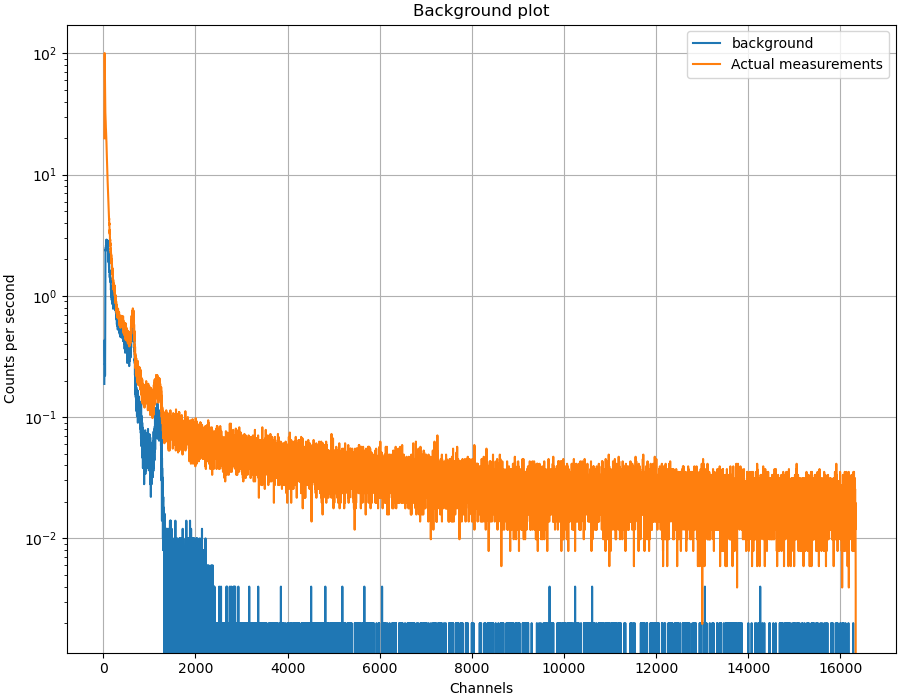

In [20]:
_, x_old, y_old, _= np.loadtxt(file_path, unpack=True, comments="#", skiprows=47)
y_old=y_old/t
fig, ax = plt.subplots(figsize=(9,7), layout='constrained')
ax.plot(channels, y_bg, label='background')
ax.plot(channels, y_old, label='Actual measurements')
ax.set_yscale("log")
ax.set_xlabel('Channels')
ax.set_ylabel('Counts per second')
ax.set_title("Background plot")
ax.grid()
ax.legend()

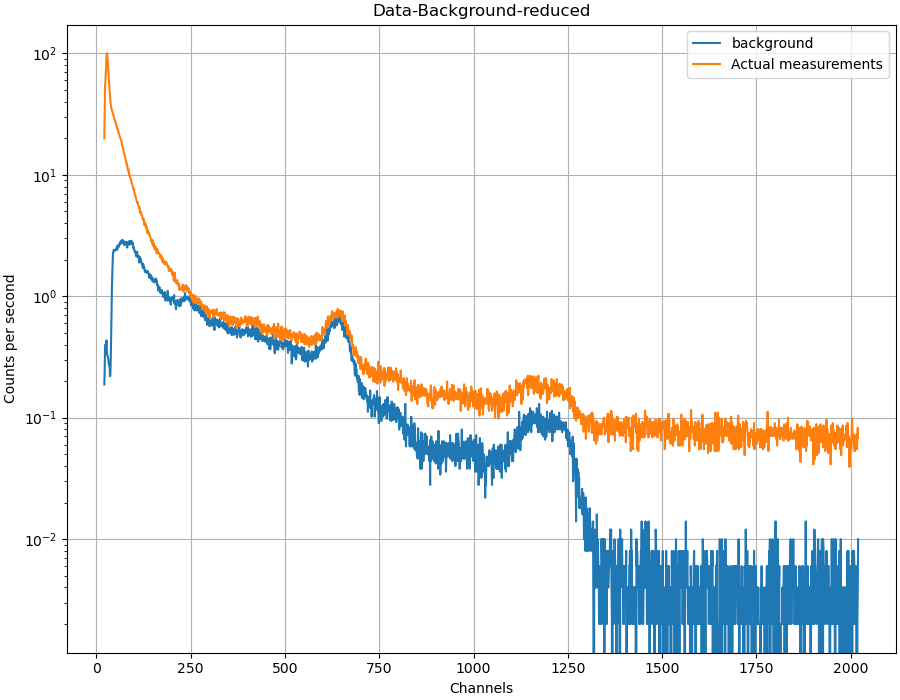

In [21]:
fig, ax = plt.subplots(num='data_bg_reduced.jpg',figsize=(9,7), layout='constrained')
ax.plot(channels[:2000], y_bg[:2000], label='background')
ax.plot(channels[:2000], y_old[:2000], label='Actual measurements')
ax.set_yscale("log")
ax.set_xlabel('Channels')
ax.set_ylabel('Counts per second')
ax.set_title("Data-Background-reduced")
ax.grid()
ax.legend()

[6.29769582e-01 6.36381553e+02 5.33821183e+01]
[1.00384860e-01 1.17626138e+03 1.04170959e+02]


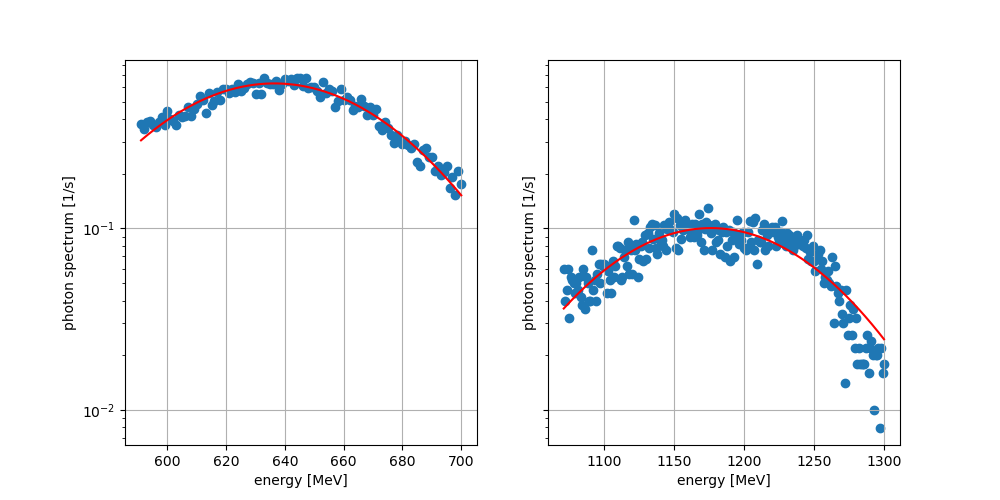

In [22]:
#analysis of peak1
x_peak_1 = channels[570:680]
y_peak_1 = y_bg[570:680]
#Analysis of peak2
x_peak_2 = channels[1050:1280]
y_peak_2 = y_bg[1050:1280]

def gauss_f(x,A,mu,sig):
    return A*np.exp(-(x-mu)**2/sig**2)

p01 = [max(y_peak_1), 640, 70]
p02 = [max(y_peak_2), 1200, 150]
popt1, pcov1 = curve_fit(gauss_f, x_peak_1, y_peak_1, p01)
A_opt1, mu_opt1, sig_opt1=popt1
x_model_1 = np.linspace(min(x_peak_1),max(x_peak_1),1000)
y_model_1 = gauss_f(x_model_1, A_opt1, mu_opt1, sig_opt1)
print(popt1)

popt2, pcov2 = curve_fit(gauss_f, x_peak_2, y_peak_2, p02)
A_opt2, mu_opt2, sig_opt2=popt2
x_model_2 = np.linspace(min(x_peak_2),max(x_peak_2),1000)
y_model_2 = gauss_f(x_model_2, A_opt2, mu_opt2, sig_opt2)
print(popt2)


# Create two subplots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
ax1.scatter(x_peak_1,y_peak_1)
ax1.plot(x_model_1, y_model_1, color='r')
ax2.scatter(x_peak_2,y_peak_2)
ax2.plot(x_model_2, y_model_2, color='r')


ax1.set_yscale("log")
ax2.set_yscale("log")
ax1.grid()
ax1.set_ylabel("photon spectrum [1/s]")
ax2.grid()
ax2.set_ylabel("photon spectrum [1/s]")
ax1.set_xlabel("energy [MeV]")
ax2.set_xlabel("energy [MeV]")
#fig.legend(bbox_to_anchor=(1, 0.5), loc='center left')
#plt.tight_layout(pad=1)
plt.show()

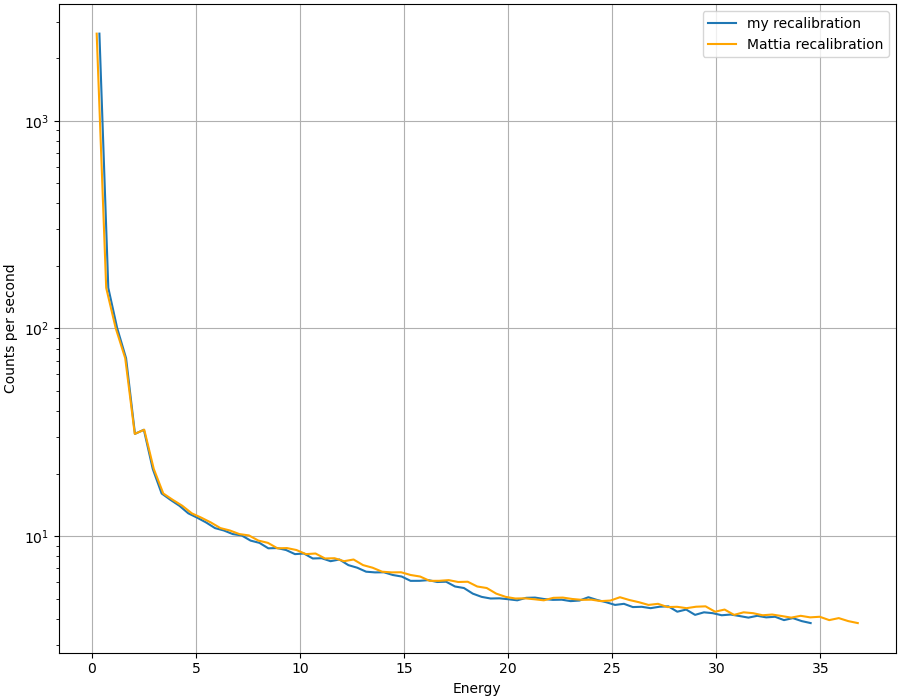

In [23]:
#Conversion
def recalibration(x):
    m=(2.614-1.461)/(mu_opt2-mu_opt1)
    return m*(x-mu_opt1)+1.461
def recalibration2(x):
    #m = (2.615-1.460) / (3.876-2.169)
    #q = 2.615 - 3.876*m
    return x * (1.460 / 0.919) #m * x + q


channels, x_old, y_old, _= np.loadtxt(file_path, unpack=True, comments="#", skiprows=47)
y_old=y_old/t
Energy, Cps = rebin(recalibration(channels),y_old,nBin)
_, y_bg = rebin(channels,y_bg, nBin)
fig, ax = plt.subplots(num="calibration comparison",figsize=(9,7), layout='constrained')
ax.plot(Energy,Cps, label='my recalibration')
x_reb, _=rebin(recalibration2(x_old),y_old,nBin=200)
ax.plot(x_reb*10**(-3), Cps, label='Mattia recalibration', color='orange')
ax.set_yscale("log")
ax.set_xlabel('Energy')
ax.set_ylabel('Counts per second')
ax.set_title("")
ax.grid()
ax.legend()

## Background subtraction

In [24]:
#Background subtraction
Energy, Cps_sub = Energy, (Cps-y_bg)/abs(x[1]-x[0])

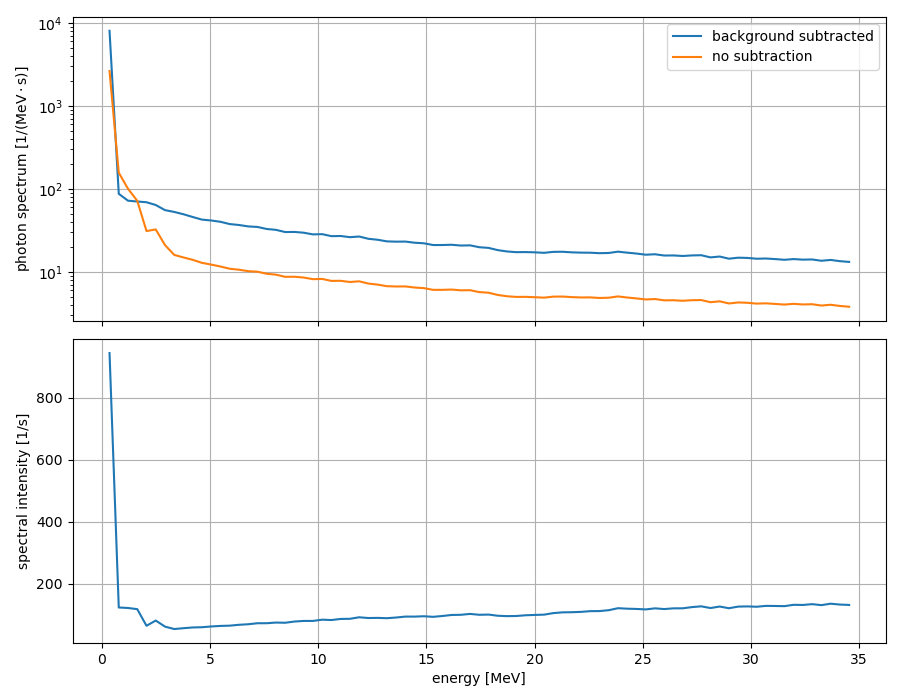

In [25]:
plt.close("spectra_final")
fig, ax = plt.subplots(num="spectra_final.jpg", figsize=[9, 7], nrows=2, sharex=True)
ax[0].plot(Energy, Cps_sub, label='background subtracted')
ax[0].plot(Energy, Cps, label = 'no subtraction')
ax[0].legend()
ax[1].plot(Energy, Cps*Energy)
ax[0].set_yscale("log")
ax[0].grid()
ax[0].set_ylabel(r"photon spectrum $[1 / (\mathrm{MeV} \cdot \mathrm{s})]$")
ax[1].grid()
ax[1].set_ylabel("spectral intensity [1/s]")
ax[1].set_xlabel("energy [MeV]")
fig.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout(pad=1)
plt.show()

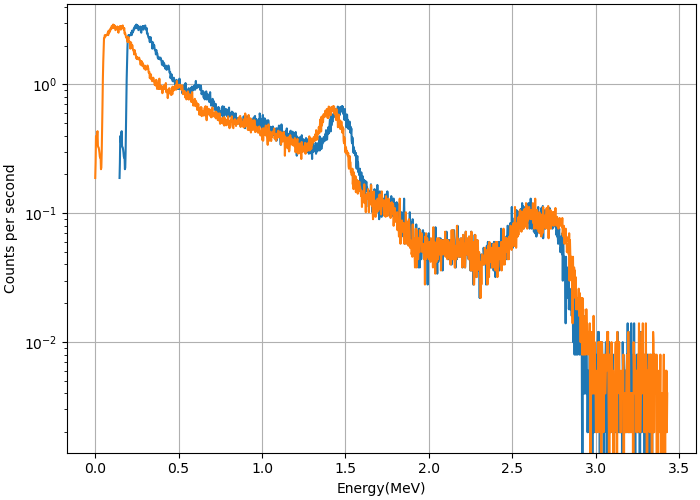

In [26]:
channels, x_bg, y_bg, _ =np.loadtxt(file_path_bg, unpack=True, comments="#", skiprows=47)
x_bg=x_bg*10**(-3)
y_bg=y_bg/t_bg

fig, ax = plt.subplots(num="proof.jpg",figsize=(7,5), layout='constrained')
ax.plot(recalibration(channels[:1500]),y_bg[:1500])
ax.plot(recalibration2(x_bg[:1500]), y_bg[:1500])
ax.set_yscale("log")
ax.set_xlabel('Energy(MeV)')
ax.set_ylabel('Counts per second')
ax.grid()


In [27]:
print(recalibration(mu_opt1),recalibration(mu_opt2))

1.461 2.614
